In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
origin = pd.read_csv("../dataset/results-2021-12-18.csv")
origin

,algorithm,RQ,experiment_id,iteration,no_datapoints,no_features,preprocessing_energy(J),preprocessing_time(s),train_energy(J),train_time(s),predict_energy(J),predict_time(s),datatype,accuracy,precision,recall,f1
0,AdaBoost,2.1,103,2,2730,8169,0.012593,1.638312,1.037993,2.012923,0.043739,1.489494,float64,0.960684,0.893617,0.802548,0.845638
1,Decision Tree,2.2,33,2,3900,2451,0.027051,1.431261,0.068482,1.506254,0.064431,1.478886,float64,0.963517,0.872146,0.852679,0.862302
2,SVM,2.2,15,22,3900,4084,0.018298,1.467225,0.530155,1.941215,0.303603,1.687695,float64,0.828349,0.431965,0.892857,0.582242
3,AdaBoost,2.2,112,1,3900,1633,0.026226,1.454106,0.243067,1.780723,0.093800,1.514068,float64,0.970096,0.910377,0.861607,0.885321
4,Bagging Classifier,2.2,138,6,3900,6535,0.027610,1.476311,0.699298,2.067553,0.056580,1.496940,float64,0.964115,0.910000,0.812500,0.858491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,Random Forest,2.2,96,2,3900,4901,0.025976,1.473068,1.501089,2.928194,0.082175,1.543079,float64,0.978469,0.989583,0.848214,0.913462
3596,Bagging Classifier,2.1,126,20,1559,8169,0.006985,1.440221,0.170978,1.651912,0.037567,1.460747,float64,0.952167,0.926471,0.700000,0.797468
3597,SVM,2.2,17,19,3900,5718,0.090063,1.408732,1.108957,2.026484,0.488150,1.690740,float64,0.828349,0.431965,0.892857,0.582242
3598,Random Forest,2.1,86,18,1559,8169,0.007155,1.437659,0.581876,2.033274,0.046828,1.480216,float64,0.955157,1.000000,0.666667,0.800000


In [3]:
data_needed = origin[["algorithm", "train_energy(J)", "predict_energy(J)"]].copy()
data_needed["ratio_energy"] = data_needed["predict_energy(J)"] / data_needed["train_energy(J)"]
data_needed

,algorithm,train_energy(J),predict_energy(J),ratio_energy
0,AdaBoost,1.037993,0.043739,0.042138
1,Decision Tree,0.068482,0.064431,0.940840
2,SVM,0.530155,0.303603,0.572669
3,AdaBoost,0.243067,0.093800,0.385902
4,Bagging Classifier,0.699298,0.056580,0.080909
...,...,...,...,...
3595,Random Forest,1.501089,0.082175,0.054744
3596,Bagging Classifier,0.170978,0.037567,0.219720
3597,SVM,1.108957,0.488150,0.440189
3598,Random Forest,0.581876,0.046828,0.080477


In [4]:
list_algo = data_needed.value_counts("algorithm").index
list_algo

Index(['AdaBoost', 'Bagging Classifier', 'Decision Tree', 'KNN',
       'Random Forest', 'SVM'],
      dtype='object', name='algorithm')

In [5]:
data_needed_groups = data_needed.groupby("algorithm")

In [6]:
def draw_heap(axes, data, x, y, x_label, y_label, title):
    axes.plot(data[x], data[y], color="green")
    axes.fill_between(data[x], data[y], color="green")
    axes.spines['right'].set_visible(False)
    axes.spines['top'].set_visible(False)

    axes.set_title(title)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)   

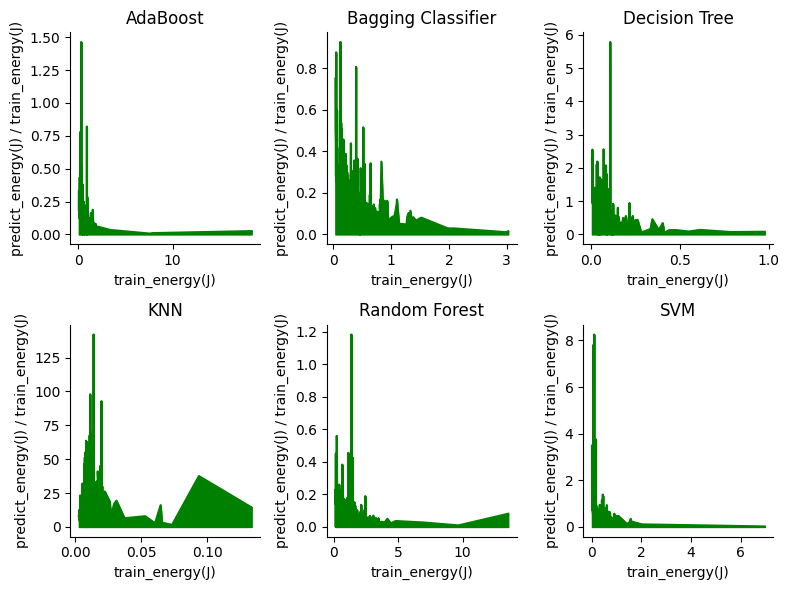

In [7]:
fig, ax = plt.subplots(2, 3)
fig.set_figheight(6)
fig.set_figwidth(8)

for index, algo in enumerate(list_algo):
    data_needed_algo = data_needed_groups.get_group(algo).sort_values("train_energy(J)")
    draw_heap(ax[index // 3][index % 3], data_needed_algo, "train_energy(J)", "ratio_energy", "train_energy(J)", "predict_energy(J) / train_energy(J)", algo)

fig.tight_layout()